In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [18]:
# Adding stock to the list of stocks and retreiving data for a period of 5 years
stocks = ['VEDL.NS', 'SBIN.NS', 'SAIL.NS', 'TCS.NS', '^NSEI']
stock = yf.download(tickers=stocks, period='10y')
Portfolio = stock['Close']
Portfolio

[*********************100%%**********************]  5 of 5 completed


,SAIL.NS,SBIN.NS,TCS.NS,VEDL.NS,^NSEI
Date,,,,,
2014-01-20,68.150002,164.184998,1169.099976,205.500000,6303.950195
2014-01-21,69.050003,165.949997,1140.150024,208.750000,6313.799805
2014-01-22,69.750000,164.684998,1137.025024,210.449997,6338.950195
2014-01-23,69.250000,165.830002,1126.224976,208.850006,6345.649902
2014-01-24,69.150002,162.119995,1124.349976,202.699997,6266.750000
...,...,...,...,...,...
2024-01-12,114.900002,633.599976,3882.800049,272.549988,21894.550781
2024-01-15,114.650002,640.099976,3903.800049,273.000000,22097.449219
2024-01-16,119.550003,636.900024,3861.300049,273.200012,22032.300781


In [19]:
Portfolio_return = Portfolio/Portfolio.shift(1)
Portfolio_return.drop(index=Portfolio_return.index[0], axis=0, inplace=True)
Portfolio_return

,SAIL.NS,SBIN.NS,TCS.NS,VEDL.NS,^NSEI
Date,,,,,
2014-01-21,1.013206,1.010750,0.975237,1.015815,1.001562
2014-01-22,1.010138,0.992377,0.997259,1.008144,1.003983
2014-01-23,0.992832,1.006953,0.990501,0.992397,1.001057
2014-01-24,0.998556,0.977628,0.998335,0.970553,0.987566
2014-01-27,0.973970,0.983531,0.991506,0.962260,0.979112
...,...,...,...,...,...
2024-01-12,1.012335,1.021606,1.039419,0.992535,1.011426
2024-01-15,0.997824,1.010259,1.005408,1.001651,1.009267
2024-01-16,1.042739,0.995001,0.989113,1.000733,0.997052


In [20]:
# Covariance heatmaps for the stocks and the standard NIFTY-Index

0.027567690786756388

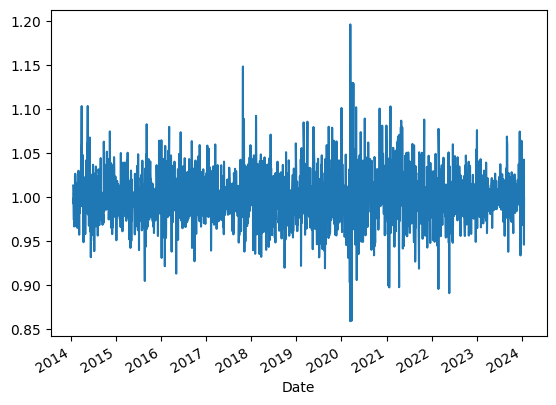

In [21]:
Portfolio_return['SAIL.NS'].plot()
dev = np.square(Portfolio_return['SAIL.NS']-Portfolio_return['SAIL.NS'].mean())
standard_deviation = np.sqrt((dev.sum())/len(Portfolio_return))
standard_deviation

Text(0.5, 0, 'daily_returns')

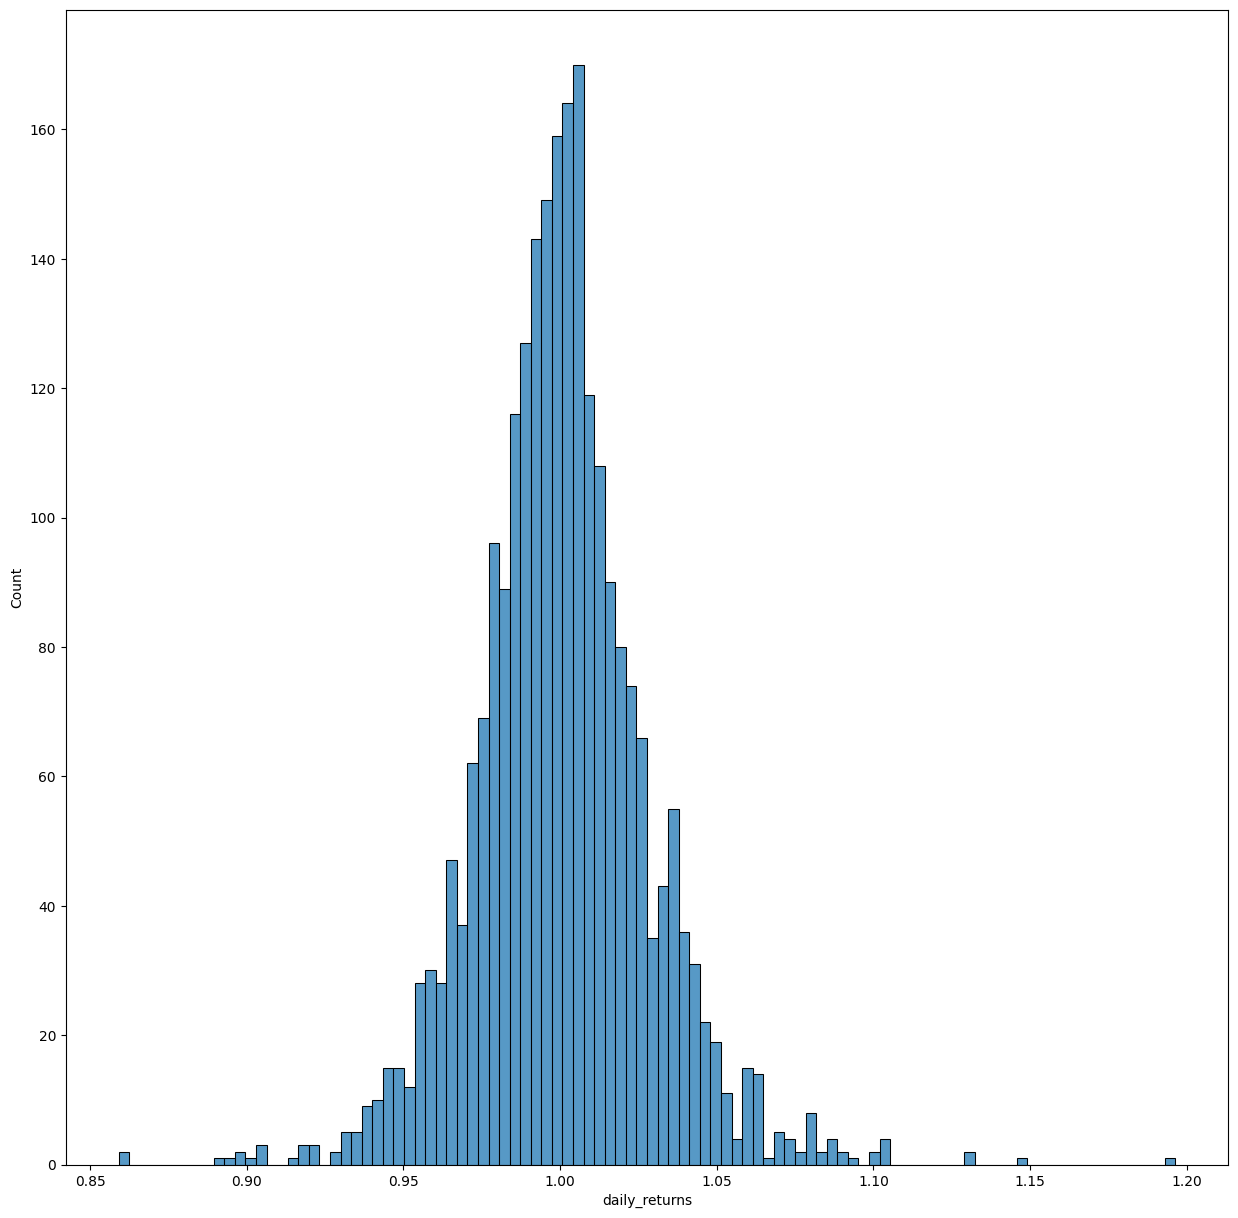

In [22]:
plt.figure(figsize=(15, 15))
sns.histplot(Portfolio_return['SAIL.NS'], bins=100, edgecolor='black')
plt.xlabel('daily_returns')